##### Ordinary Least Square(OSL)
- 선형 회귀 모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 여러 통계 테스트를 수행하는 여러 클래스와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용하여 생성되며, 가장 일반적인 방법이다.
- P>|t| (p-value): 0.05보다 작으면 독립 변수가 종속 변수에 영향을 미치는 것이 유의미하다는 것을 의미한다.
- Durbin-Watson: 보통 1.5에서 2.5 사이이면 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- 🚩 단, R<sup>2</sup> 값을 유지 또는 개선시키는 방향으로만 수행한다.

##### VIF(Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.

##### 다중 공선성(Multicollinearity)
- 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 의미한다.
<img src="./images/multicollinearity.png" style="margin-left: 0">

##### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

In [2]:
import pandas as pd

customer_df = pd.read_csv('./datasets/customers.csv')
customer_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [3]:
customer_df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [4]:
customer_df.Profession.value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [5]:
customer_df = customer_df[~customer_df.Profession.isna()]
customer_df = customer_df.reset_index(drop=True)
customer_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [6]:
customer_df.duplicated().sum()

0

In [7]:
customer_df = customer_df.drop(columns='CustomerID', axis=1)
customer_df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1960,Female,71,184387,40,Artist,8,7
1961,Female,91,73158,32,Doctor,7,7
1962,Male,87,90961,14,Healthcare,9,2
1963,Male,77,182109,4,Executive,7,2


In [8]:
customer_df['Score'] = customer_df['Spending Score (1-100)']
customer_df = customer_df.drop(columns='Spending Score (1-100)', axis=1)
customer_df

,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Score
0,Male,19,15000,Healthcare,1,4,39
1,Male,21,35000,Engineer,3,3,81
2,Female,20,86000,Engineer,1,1,6
3,Female,23,59000,Lawyer,0,2,77
4,Female,31,38000,Entertainment,2,6,40
...,...,...,...,...,...,...,...
1960,Female,71,184387,Artist,8,7,40
1961,Female,91,73158,Doctor,7,7,32
1962,Male,87,90961,Healthcare,9,2,14
1963,Male,77,182109,Executive,7,2,4


In [9]:
from sklearn.preprocessing import LabelEncoder

encoders = []
columns = ['Gender', 'Profession']

for column in columns:
    encoder = LabelEncoder()
    encoded_feature = encoder.fit_transform(customer_df[column])
    customer_df[column] = encoded_feature
    print(encoder.classes_)
    encoders.append(encoder)

['Female' 'Male']
['Artist' 'Doctor' 'Engineer' 'Entertainment' 'Executive' 'Healthcare'
 'Homemaker' 'Lawyer' 'Marketing']


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


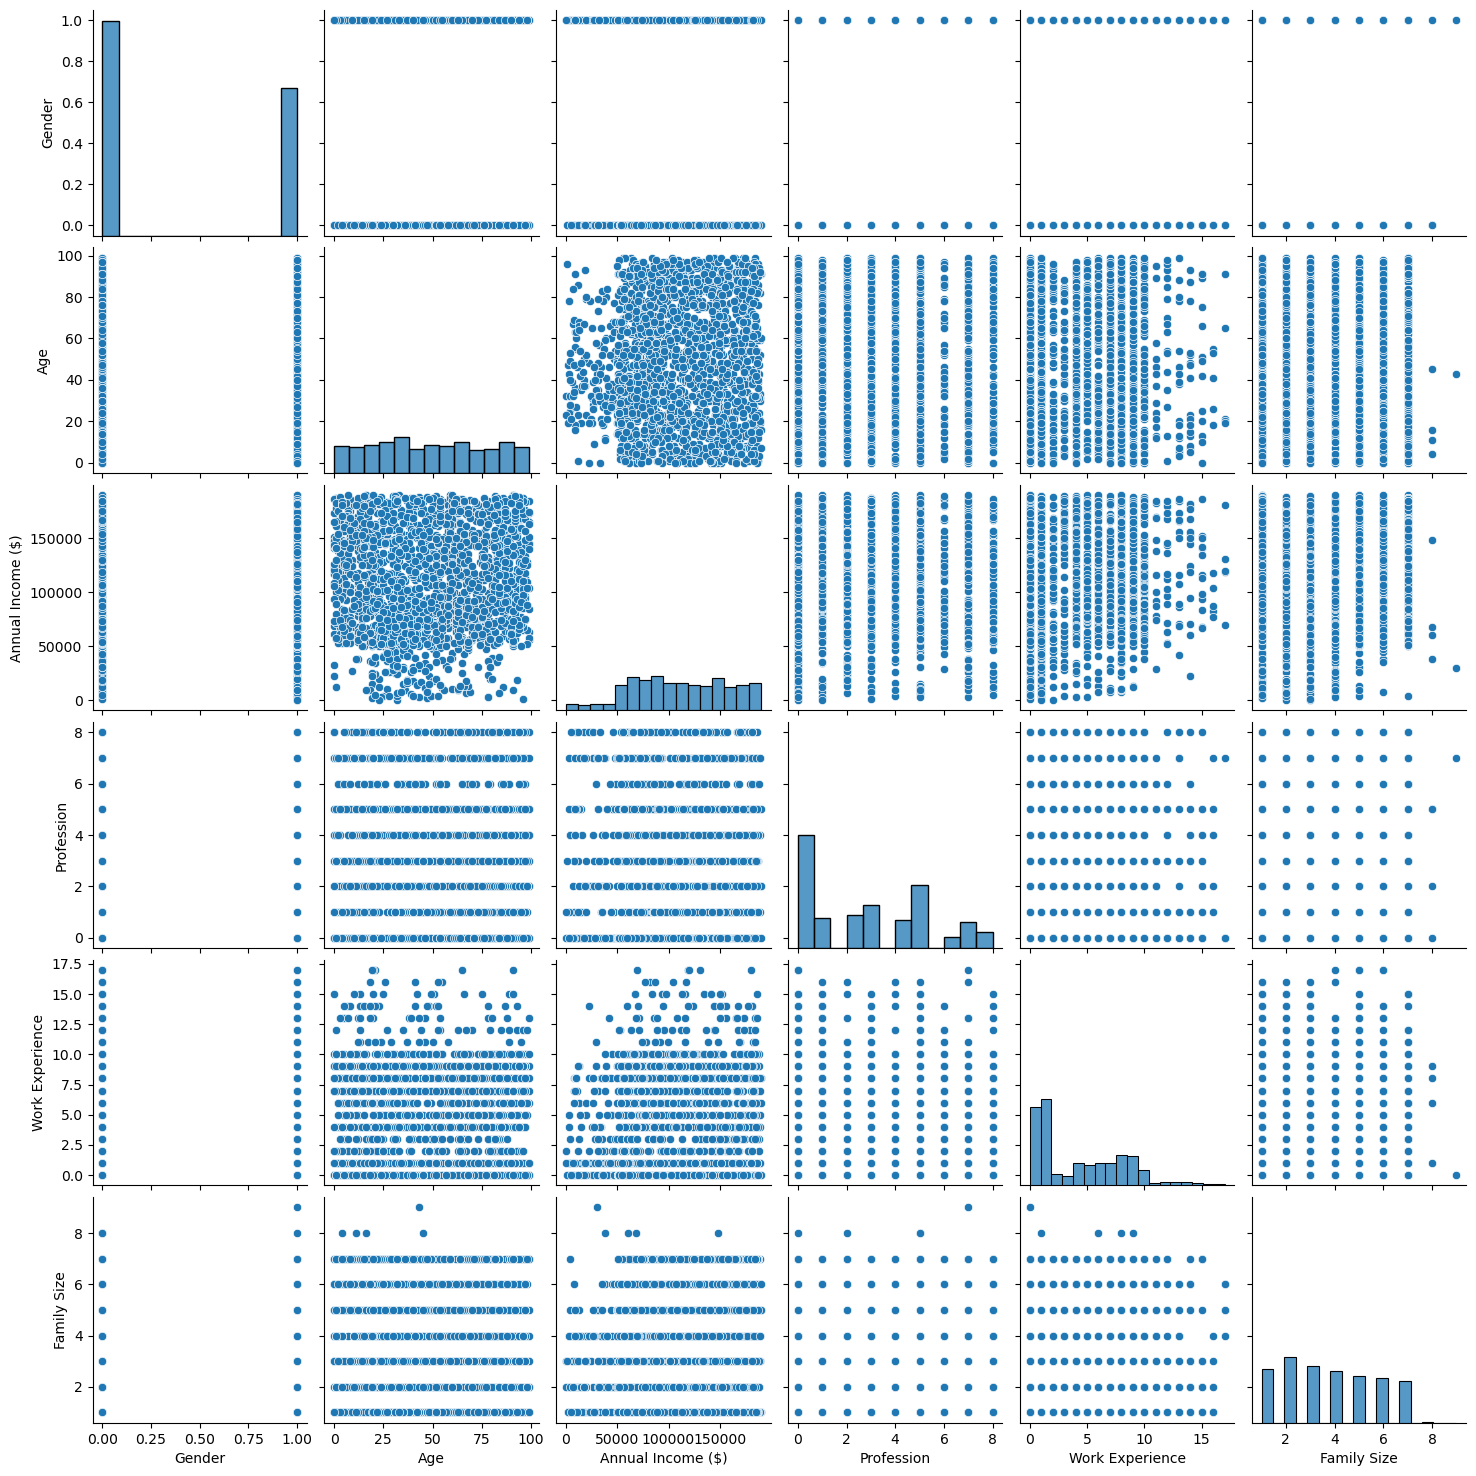

In [10]:
import matplotlib.pyplot as plt
# conda install -c conda-forge seaborn   (0.12.2 이상)
import seaborn as sns

sns.pairplot(customer_df[['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size']])
plt.show()

In [11]:
import statsmodels.api as sm
##### 성별과 가족 구성원 수가 가장 큰 영향을 미친다.
model = sm.OLS(customer_df[['Score']], customer_df[['Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size']])
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                              818.9
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                        09:35:11   Log-Likelihood:                         -9541.8
No. Observations:                1965   AIC:                                  1.910e+04
Df Residuals:                    1959   BIC:                                  1.913e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [14]:
print(feature_engineering_VIF(customer_df.iloc[:, :-1]))

   vif_score            feature
0   1.613395             Gender
1   3.231429                Age
2   4.849631  Annual Income ($)
3   2.069247         Profession
4   2.000652    Work Experience
5   3.891686        Family Size
